In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv("C:\\Users\\관리자\\Desktop\\인공지능 개론\\데이터 셋\\titanic.csv", index_col = 0)
# C:/USers/GC/ : 파일이 저장된 디렉토리 위치, 각자에 맞게 수정

In [60]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [61]:
# 결측치 제거
print('null값이 있는 train 데이터의 칼럼들:\n', data.isnull().sum())
print("-"*10)

data.describe(include = 'all')

null값이 있는 train 데이터의 칼럼들:
 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
----------


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<h3>#결측치의 비율 확인</h3>

In [62]:
data.isna().sum()/len(data)

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

<h3>#Age 열의 결측치를 평균값으로 채우기</h3>

In [63]:
data['Age'].fillna(data['Age'].mean(), inplace = True)
print(data['Age'].isna().sum())

0


<h3>#Embarked열의 결측치를 최빈값으로 채우기</h3>

In [64]:
data['Embarked'].value_counts(dropna = False)
data['Embarked'].fillna('Southampton', inplace = True)
#확인
data['Embarked'].value_counts(dropna=False)

S              644
C              168
Q               77
Southampton      2
Name: Embarked, dtype: int64

In [65]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
del data['Cabin']
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [67]:
# Survived를 타겟 레이블로 삼아서 EDA 수행
# 1. Plass 레이블별 갯수 및 차트표시
# 2. 생존자와 사망자 총 숫자 및 차트표시
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석
# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 수행

In [68]:
target = data['Survived']
target.shape

(891,)

Text(0.5, 1.0, 'Pclass')

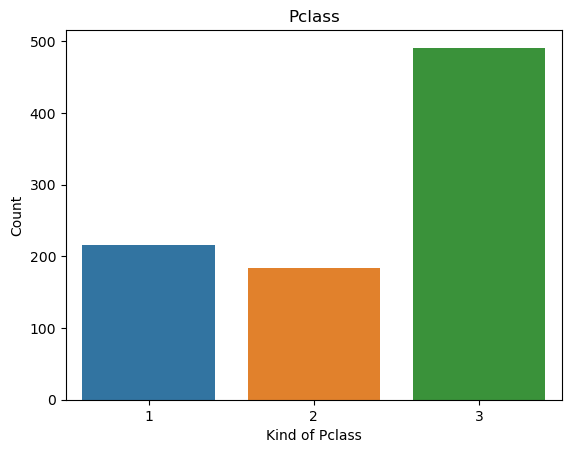

In [69]:
import seaborn as sns
sns.countplot(data = data, x="Pclass")
plt.xlabel("Kind of Pclass")
plt.ylabel("Count")
plt.title("Pclass")

In [70]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Survived')

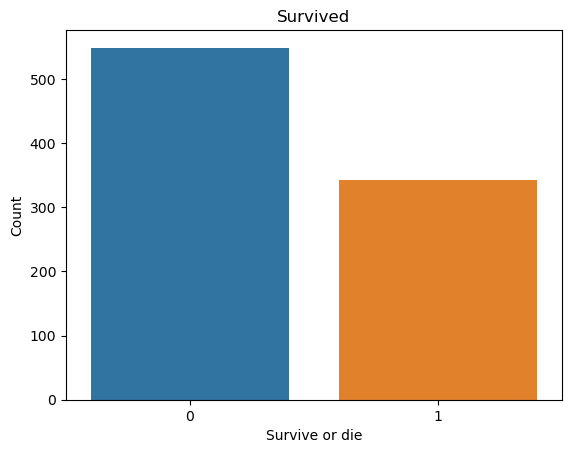

In [71]:
sns.countplot(data = data, x="Survived")
plt.xlabel("Survive or die")
plt.ylabel("Count")
plt.title("Survived")

In [72]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

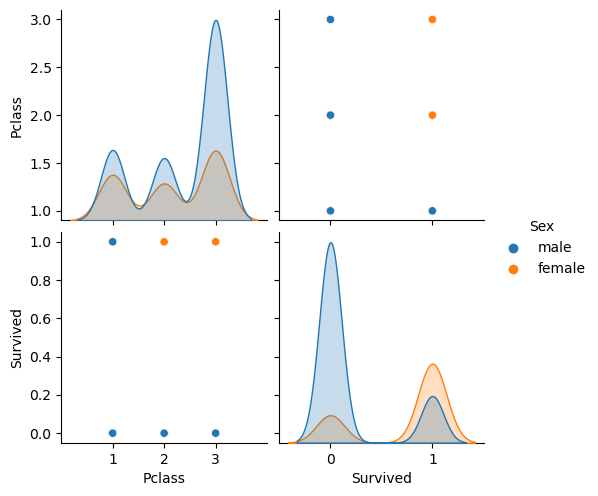

In [73]:
sns.pairplot(data=data, vars=['Pclass','Survived'], hue= 'Sex')
plt.show()

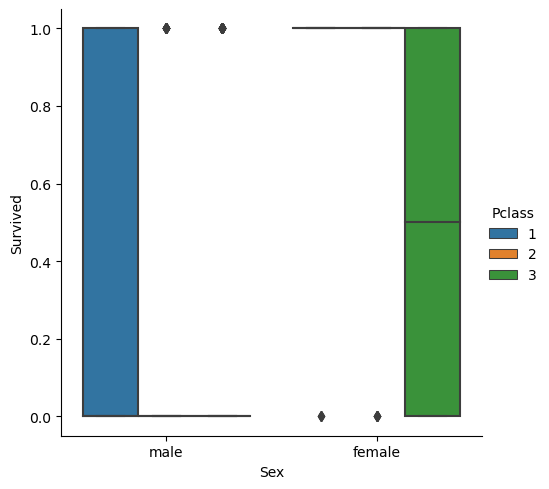

In [74]:
sns.catplot(data=data, hue  = 'Pclass',x = 'Sex', y ='Survived', kind='box')

In [75]:
X=data.drop('Survived',axis = 1)
print(X.shape)
print(X.head())

(891, 9)
             Pclass                                               Name  \
PassengerId                                                              
1                 3                            Braund, Mr. Owen Harris   
2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3                 3                             Heikkinen, Miss. Laina   
4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5                 3                           Allen, Mr. William Henry   

                Sex   Age  SibSp  Parch            Ticket     Fare Embarked  
PassengerId                                                                  
1              male  22.0      1      0         A/5 21171   7.2500        S  
2            female  38.0      1      0          PC 17599  71.2833        C  
3            female  26.0      0      0  STON/O2. 3101282   7.9250        S  
4            female  35.0      1      0            113803  53.1000        S  
5   

In [76]:
y=data['Survived']
print(y.shape)
print(y.value_counts())

(891,)
0    549
1    342
Name: Survived, dtype: int64


In [77]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
df = ['Sex', 'Embarked']
for dfarray in df :
    X[dfarray] = le.fit_transform(X[dfarray])
    
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


<h3> #훈련 데이터, 테스트 데이터 나누기</h3>

In [78]:
# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 수행
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [79]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'Partner, Mr. Austen'

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

ValueError: could not convert string to float: 'Partner, Mr. Austen'